<a href="https://colab.research.google.com/github/karoline-juliana/posgrad_cienciadados/blob/main/Censo_agropecuario_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Censo agropecuário do Brasil entre os anos 1985 e 2017.

**Equipe:**
- Bruno Lezan Bittencourt
- Djayana Figueredo
- Karoline Costa da Silva
- Michele Nunes
- Xadai Rudá

# Sumário

* Base de dados
* Importando bibliotecas
* Estatística descritiva
-- Descritiva
-- Correlação de Pearson
-- Histograma
-- Boxplot
* Limpeza e Adequação dos dados
-- Valores Faltantes
-- Adiçao de novos dados
* Análise Exploratória dos Dados (EDA)
-- Área colhida
-- Número de estabelecimentos
-- Quantidade produzida
-- Valor da produção
-- Ano com maior valor total de produção de café
* Conclusão

# Base de dados

A base de dados utilizada foi construída utilizando os dados disponibilizados pelo Base dos dados, uma organização não-governamental, sem fins lucrativos, open source e colaborativa. Segundo os organizadores, "Atuamos nesse objetivo catalogando e organizando bases de dados públicas que podem ser encontradas através do nosso mecanismo de busca, com informações estruturadas dos conjuntos de dados e a possibilidade de download direto".

Escolhemos do dataset disponibilizado sobre o Censo Agropecuário do Brasil  referente aos anos de 1985 a 2017, no qual pode ser visualizado nesse [link](https://basedosdados.org/dataset/br-ibge-censo-agropecuario?bdm_table=municipio). 

No total, foram utilizados 8 das 116 features disponíveis na base de dados sobre o Censo agropecuário, sendo constituído por 20738 registros. A seguir detalhamos as features empregadas na construção de nossa base de dados: 

- ano - de 1985 a 2017
- sigla_uf - Sigla da UF
- id_municipio - ID Município - IBGE 7 Dígitos
- area_total - Área Total em hectares
- producao_cafe - Produção de Café em Toneladas
- area_cafe - Área destinada ao plantio de Café em hectares
- quantidade_estabelecimentos_cafe - Número de Estabelecimentos destinados à produção de Café
- valor_total_producao_cafe - Valor Total da produção de Café em Reais (R$)

Também foram adicionadas à base informações disponíveis pelo IBGE sobre o nome dos municípios baseado no seu respectivo código de 7 dígitos. O dataset pode ser visualizado nesse [link](https://basedosdados.org/dataset/codigos-dos-municipios-ibge?external_link=Visualizar+e+Baixar).

# Importando Bibliotecas

In [ ]:
!pip install plotly
!pip install geobr
!pip install --upgrade xlrd
# Manipulação de dados
import pandas as pd
import numpy as np
# Plots gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geobr
%matplotlib inline
# Esconder os erros 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Dataset do Censo
df = pd.read_csv('municipio.csv')

In [ ]:
df_cafe = df[['ano', 'sigla_uf', 'id_municipio','producao_cafe', 'area_cafe', 'area_total', 'quantidade_estabelecimentos_cafe', 'valor_total_producao_cafe']]

In [ ]:
df_cafe.head()

,ano,sigla_uf,id_municipio,producao_cafe,area_cafe,area_total,quantidade_estabelecimentos_cafe,valor_total_producao_cafe
0,1996,RO,1100015,NaN,2793.0,422541.34,NaN,162835
1,2006,RO,1100015,1122.00,248.0,295021.75,NaN,276448
2,2017,RO,1100015,334.00,216.0,372746.00,112.0,1415
3,1985,RO,1100023,12039.00,4343.0,NaN,NaN,71654
4,1996,RO,1100023,4295.88,1075.0,NaN,NaN,150832


In [ ]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20738 entries, 0 to 20737
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ano                               20738 non-null  int64  
 1   sigla_uf                          20738 non-null  object 
 2   id_municipio                      20738 non-null  int64  
 3   producao_cafe                     20329 non-null  float64
 4   area_cafe                         20664 non-null  float64
 5   area_total                        15258 non-null  float64
 6   quantidade_estabelecimentos_cafe  12152 non-null  float64
 7   valor_total_producao_cafe         20738 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
df_cafe.shape

(20738, 8)

In [ ]:
# Dataset dos nomes do município
df_municipio = pd.read_excel('/content/RELATORIO_DTB_BRASIL_MUNICIPIO.xls')

In [ ]:
df_municipio.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [ ]:
df_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   UF                                    5570 non-null   int64 
 1   Nome_UF                               5570 non-null   object
 2   Região Geográfica Intermediária       5570 non-null   int64 
 3   Nome Região Geográfica Intermediária  5570 non-null   object
 4   Região Geográfica Imediata            5570 non-null   int64 
 5   Nome Região Geográfica Imediata       5570 non-null   object
 6   Mesorregião Geográfica                5570 non-null   int64 
 7   Nome_Mesorregião                      5570 non-null   object
 8   Microrregião Geográfica               5570 non-null   int64 
 9   Nome_Microrregião                     5570 non-null   object
 10  Município                             5570 non-null   int64 
 11  Código Município Completo     

In [ ]:
df_municipio.shape

(5570, 13)

# Estatística

## Descritiva

In [ ]:
df_cafe.describe().T

,count,mean,std,min,25%,50%,75%,max
ano,20738.0,2.002139e+03,11.463022,1985.0,1996.00,2006.000,2.017000e+03,2017.0
id_municipio,20738.0,3.248459e+06,969670.824740,1100015.0,2513968.00,3145084.000,4.115309e+06,5300108.0
producao_cafe,20329.0,3.108249e+02,1512.811294,0.0,0.00,0.000,1.900000e+01,55135.0
area_cafe,20664.0,1.133516e+02,687.447018,0.0,0.00,0.000,2.000000e+01,39287.0
area_total,15258.0,6.864581e+04,159588.017159,0.0,12269.02,25880.325,6.047378e+04,5267311.0
quantidade_estabelecimentos_cafe,12152.0,4.449934e+01,2254.061569,0.0,0.00,0.000,0.000000e+00,234902.0
valor_total_producao_cafe,20738.0,2.274011e+04,55167.174201,0.0,16.00,7376.000,2.125475e+04,1727475.0


In [ ]:
df_municipio.describe().T

,count,mean,std,min,25%,50%,75%,max
UF,5570.0,3.237774e+01,9.833862,11.0,25.00,31.0,41.0,53.0
Região Geográfica Intermediária,5570.0,3.241853e+03,983.813693,1101.0,2503.00,3107.0,4104.0,5301.0
Região Geográfica Imediata,5570.0,3.237935e+05,98340.639166,110001.0,250009.00,310039.0,410019.0,530001.0
Mesorregião Geográfica,5570.0,4.264991e+00,3.206175,1.0,2.00,3.0,6.0,15.0
Microrregião Geográfica,5570.0,1.763357e+01,15.514306,1.0,6.00,13.0,24.0,66.0
Município,5570.0,1.581698e+04,15997.299780,13.0,4507.25,10400.5,20853.0,72202.0
Código Município Completo,5570.0,3.253591e+06,984910.339431,1100015.0,2512125.75,3146280.0,4119189.5,5300108.0


## Correlaçao de Pearson


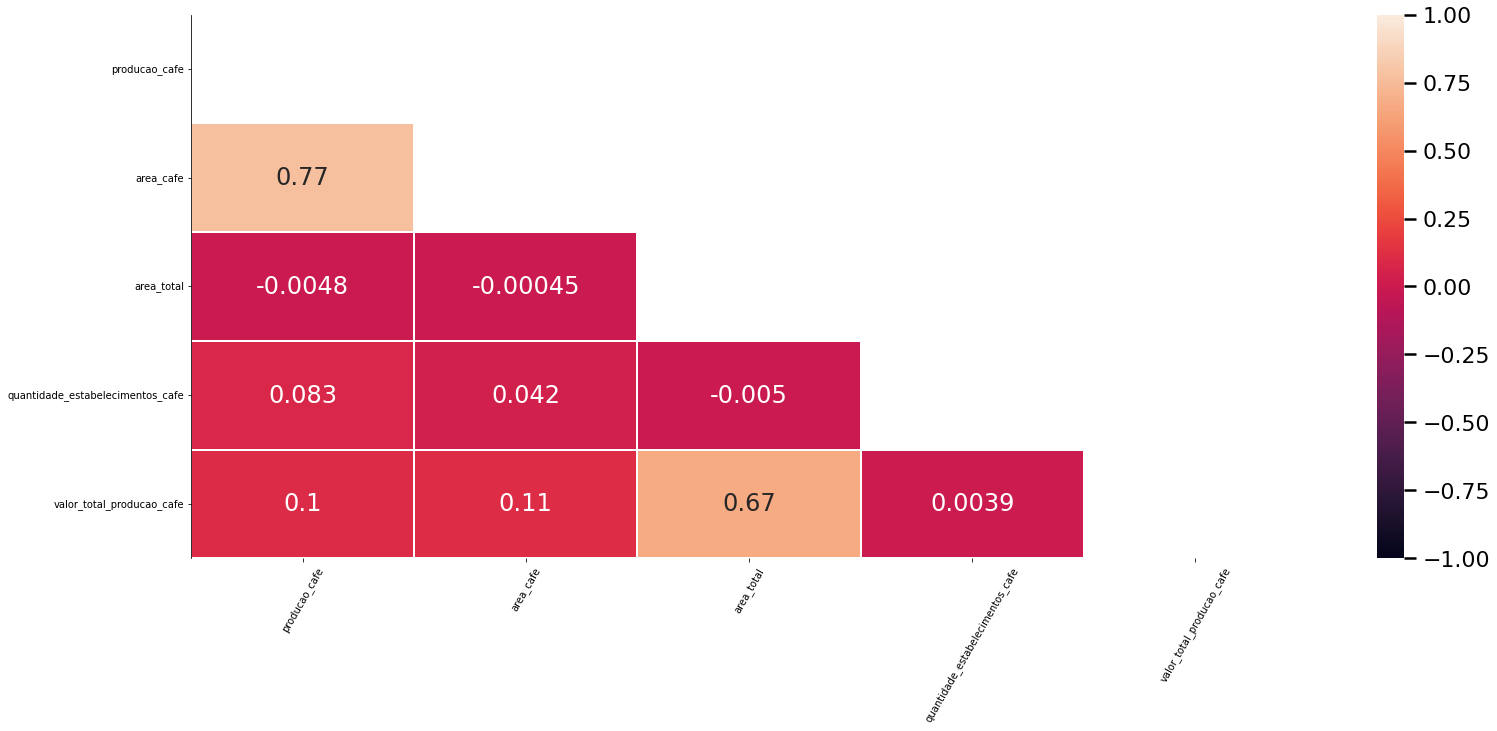

In [ ]:
# Excluindo colunas do ano e id_municipio para correlação
correlacao_df = df_cafe.drop(['ano','id_municipio'],axis=1).corr()
matrix = np.triu(correlacao_df)
# plotando
f, ax = plt.subplots(figsize=(25,10))
plt.style.use('seaborn-notebook')
sns.set_context('poster',font_scale=1)
sns.set_color_codes("pastel")
ax = sns.heatmap(correlacao_df, annot=True, linewidths=1, mask=matrix, vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
sns.despine(left=False, bottom=True)

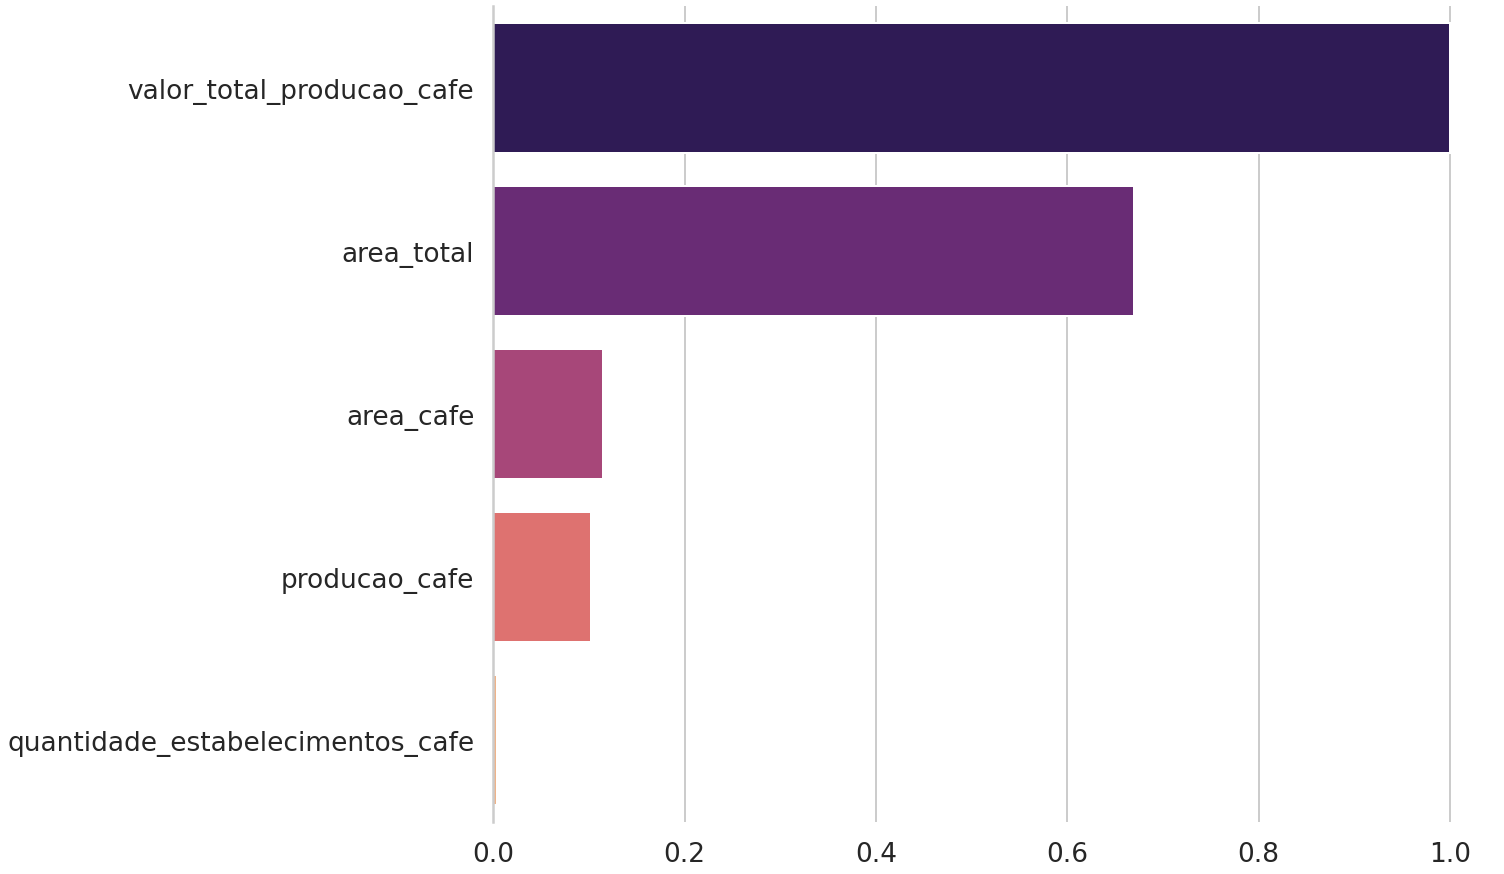

In [ ]:
# Correlação com valor_total_producao_cafe
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
plt.style.use('seaborn-notebook')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=1.2)
#Tela vazia de 1 por 2 subplots
fig, axes = plt.subplots(figsize=(18, 15))
correlacao_df = df_cafe.drop(['ano','id_municipio'],axis=1).corr()['valor_total_producao_cafe'].sort_values(ascending=False)
sns.barplot(x=correlacao_df.values, y=correlacao_df.keys(), palette='magma')
axes.set(ylabel="", xlabel="")
sns.despine(left=False, bottom=True)

Como pôde-se observar, algumas features tem corelações fortes, enquanto outras features possuem correlação baixa.
* correlaçao forte: com o valor total de produção de café, são a área total, a area para café e produção de café
* correlação fraca: com o valor total de produção de café, é a quantidade de estabelecimentos de café

## Histograma

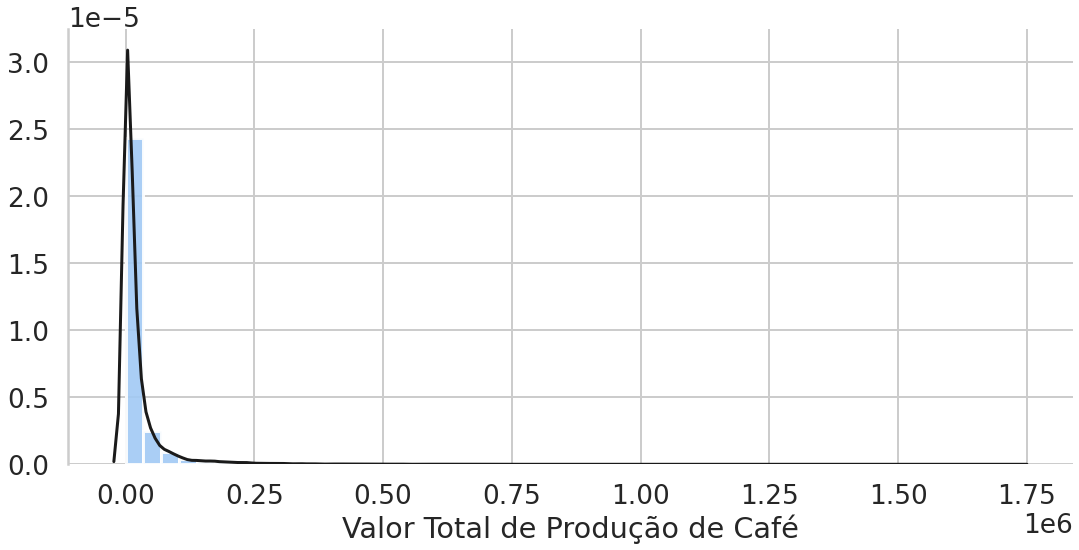

In [ ]:
plt.style.use('seaborn-notebook')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=1.2)
fig, axes = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")
#plot seaborn
sns.distplot(df_cafe['valor_total_producao_cafe'],50,norm_hist=True,kde_kws={"color": "k", "lw": 3, "label": "R$"},
         hist_kws={"linewidth": 3,"alpha": 0.9, "color": "b"})

axes.set(ylabel="", xlabel="Valor Total de Produção de Café")
sns.despine(left=False, bottom=True)

## Box plot

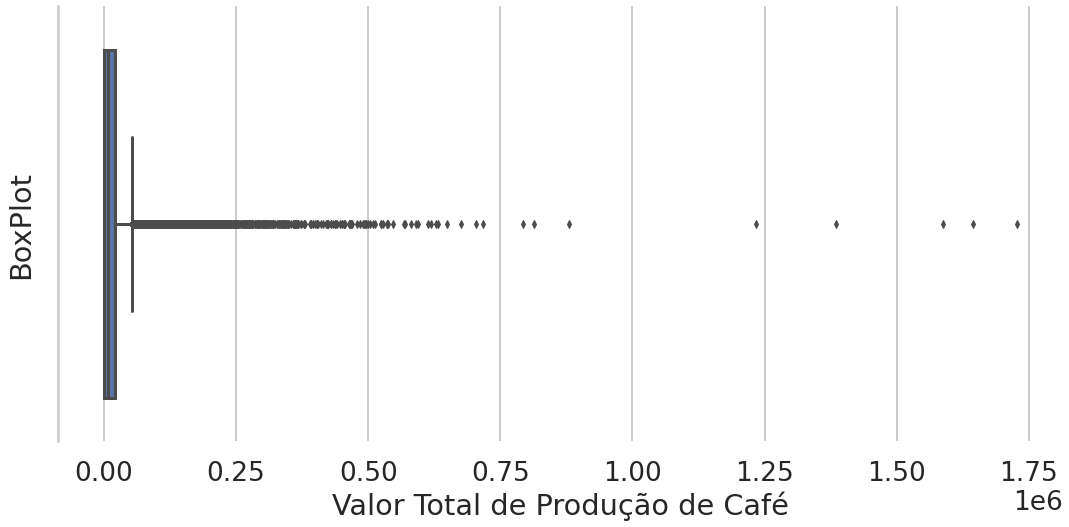

In [ ]:
import scipy.stats as stats

formatter = ticker.ScalarFormatter(useMathText=True)
plt.style.use('seaborn-notebook')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=1.2)
#Tela vazia de 1 por 2 subplots
fig, axes = plt.subplots(figsize=(18, 8))
sns.boxplot(x='valor_total_producao_cafe',data=df_cafe)
axes.set(ylabel="BoxPlot", xlabel="Valor Total de Produção de Café")
sns.despine(left=False, bottom=True)

# Limpeza e Adequação dos dados

## Valores faltantes

In [ ]:
# Função para calcular valores faltantes por coluna
def valor_faltante(df):
        # Total de valores faltantes
        mis_val = df.isnull().sum()
        
        # Porcentagem de valores faltantess
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Fazer tabela com os resultados
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renomeando as coluanas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% do total de valores'})
        
        # Ordenando pela porcentagem de valores faltantes
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% do total de valores', ascending=False).round(1)
        
        # Print 
        print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"      
            "Ao total, temos " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores faltantes.")
        
        # Retorna to dataframe
        return mis_val_table_ren_columns

In [ ]:
valor_faltante(df_cafe)

O dataset tem 8 colunas.
Ao total, temos 4 colunas com valores faltantes.


,Valores Faltantes,% do total de valores
quantidade_estabelecimentos_cafe,8586,41.4
area_total,5480,26.4
producao_cafe,409,2.0
area_cafe,74,0.4


Embora a feature quantidade_estabelecimentos_cafe possui uma correlação fraca, vamos substituir os valores ausentes de todos as features que possuem valores ausentes pela sua média.

Alterando os valores ausentes das features apresentadas pela média.

In [ ]:
df_cafe['quantidade_estabelecimentos_cafe'].fillna(value=df_cafe['quantidade_estabelecimentos_cafe'].mean(),inplace=True)
df_cafe['area_total'].fillna(value=df_cafe['area_total'].mean(),inplace=True)
df_cafe['producao_cafe'].fillna(value=df_cafe['producao_cafe'].mean(),inplace=True)
df_cafe['area_cafe'].fillna(value=df_cafe['area_cafe'].mean(),inplace=True)

In [ ]:
valor_faltante(df_cafe)

O dataset tem 8 colunas.
Ao total, temos 0 colunas com valores faltantes.


,Valores Faltantes,% do total de valores


## Adição de novos dados

Concatenando os dataframes df_cafe e df_municipio pela feature id_municipio.

In [ ]:
# Alterando o nome da coluna
df_municipio.rename(columns = {'Código Município Completo':'id_municipio'}, inplace = True)

In [ ]:
df_municipio.columns

Index(['UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'id_municipio', 'Nome_Município'],
      dtype='object')

In [ ]:
# Concatenando
df_cafe = df_cafe.merge(df_municipio, how='left', on='id_municipio')

In [ ]:
df_cafe

,ano,sigla_uf,id_municipio,producao_cafe,area_cafe,area_total,quantidade_estabelecimentos_cafe,valor_total_producao_cafe,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Nome_Município
0,1996,RO,1100015,310.824926,2793.0,422541.340000,44.499342,162835,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,Alta Floresta D'Oeste
1,2006,RO,1100015,1122.000000,248.0,295021.750000,44.499342,276448,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,Alta Floresta D'Oeste
2,2017,RO,1100015,334.000000,216.0,372746.000000,112.000000,1415,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,Alta Floresta D'Oeste
3,1985,RO,1100023,12039.000000,4343.0,68645.807861,44.499342,71654,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,Ariquemes
4,1996,RO,1100023,4295.880000,1075.0,68645.807861,44.499342,150832,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,Ariquemes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20733,2017,GO,5222302,0.000000,0.0,186118.000000,1.000000,0,52,Goiás,5205,Porangatu - Uruaçu,520018,Ceres - Rialma - Goianésia,4,Leste Goiano,12,Entorno de Brasília,22302,Vila Propício
20734,1985,DF,5300108,730.000000,790.0,313824.300000,44.499342,75866,53,Distrito Federal,5301,Distrito Federal,530001,Distrito Federal,1,Distrito Federal,1,Brasília,108,Brasília
20735,1996,DF,5300108,796.120000,38.0,0.000000,44.499342,85615,53,Distrito Federal,5301,Distrito Federal,530001,Distrito Federal,1,Distrito Federal,1,Brasília,108,Brasília
20736,2006,DF,5300108,508.000000,44.0,251319.700000,44.499342,81441,53,Distrito Federal,5301,Distrito Federal,530001,Distrito Federal,1,Distrito Federal,1,Brasília,108,Brasília


# Análise Exploratória de Dados

As perguntas formuladas que pretendemos obter as respostas são:

* Qual UF possui maior área de plantação de café em ha? E dentro de tal UF, qual município possui maior área de plantação de café em ha?

* Qual UF possui maior número de estabelecimentos de café? E dentro de tal UF, qual município possui maior número de estabelecimentos de café?

* Qual UF possui maior quantidade de café produzida por kg? E dentro de tal UF, qual município possui maior quantidade de café produzida por kg?

* Qual UF possui maior valor em Reais de produção de café? E dentro de tal UF, qual município possui maior valor em R$ de produção de café?

* Qual foi o ano com maior valor total de produção de café em R$?

## Qual UF possui maior área de plantação de café em ha? E dentro de tal UF, qual município possui maior área de plantação de café em ha?

In [ ]:
df_area_colhida = df_cafe.groupby(['Nome_UF'])[['Nome_UF','area_cafe']].sum().sort_values(by='area_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_area_colhida, x=df_area_colhida.index, y='area_cafe', text_auto='.2s', title="Ranking - Café - dos Estados do Brasil por Área colhida")
fig.show()

In [ ]:
df_area_colhida_mg = df_cafe.query("Nome_UF == 'Minas Gerais'").groupby(['Nome_Município'])[['Nome_Município','area_cafe']].sum().sort_values(by='area_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_area_colhida_mg, x=df_area_colhida_mg.index, y='area_cafe', text_auto='.2s', title="Ranking - Café - dos Municípios de Minas Gerais por Área colhida")
fig.show()

## Qual UF possui maior número de estabelecimentos de café? E dentro de tal UF, qual município possui maior número de estabelecimentos de café?

In [ ]:
df_estabelecimentos = df_cafe.groupby(['Nome_UF'])[['Nome_UF','quantidade_estabelecimentos_cafe']].sum().sort_values(by='quantidade_estabelecimentos_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_estabelecimentos, x=df_estabelecimentos.index, y='quantidade_estabelecimentos_cafe', text_auto='.2s', title="Ranking - Café - dos Estados do Brasil por número de estabelecimentos")
fig.show()

In [ ]:
df_estabelecimentos_sp = df_cafe.query("Nome_UF == 'São Paulo'").groupby(['Nome_Município'])[['Nome_Município','quantidade_estabelecimentos_cafe']].sum().sort_values(by='quantidade_estabelecimentos_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_estabelecimentos_sp, x=df_estabelecimentos_sp.index, y='quantidade_estabelecimentos_cafe', text_auto='.2s', title="Ranking - Café - do Município de São Paulo por número de estabelecimentos")
fig.show()

## Qual UF possui maior quantidade de café produzida por kg? E dentro de tal UF, qual município possui maior quantidade de café produzida por kg?

In [ ]:
df_qtd_produzida = df_cafe.groupby(['Nome_UF'])[['Nome_UF','producao_cafe']].sum().sort_values(by='producao_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_qtd_produzida, x=df_qtd_produzida.index, y='producao_cafe', text_auto='.2s', title="Ranking - Café - dos Estados do Brasil por produção de café")
fig.show()

In [ ]:
df_qtd_produzida_mg = df_cafe.query("Nome_UF == 'Minas Gerais'").groupby(['Nome_Município'])[['Nome_Município','producao_cafe']].sum().sort_values(by='producao_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_qtd_produzida_mg, x=df_qtd_produzida_mg.index, y='producao_cafe', text_auto='.2s', title="Ranking - Café - do Município de Minas Gerais por produção de café")
fig.show()

## Qual UF possui maior valor em Reais de produção de café? E dentro de tal UF, qual município possui maior valor em R$ de produção de café?

In [ ]:
df_valor_producao = df_cafe.groupby(['Nome_UF'])[['Nome_UF','valor_total_producao_cafe']].sum().sort_values(by='valor_total_producao_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_valor_producao, x=df_valor_producao.index, y='valor_total_producao_cafe', text_auto='.2s', title="Ranking - Café - dos Estados do Brasil por valor total de produção de café")
fig.show()

In [ ]:
df_valor_producao_mg = df_cafe.query("Nome_UF == 'Minas Gerais'").groupby(['Nome_Município'])[['Nome_Município','valor_total_producao_cafe']].sum().sort_values(by='valor_total_producao_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_valor_producao_mg, x=df_valor_producao_mg.index, y='valor_total_producao_cafe', text_auto='.2s', title="Ranking - Café - do município de Minas Gerais por valor total de produção de café")
fig.show()

## Qual foi o ano com maior valor total de produção de café em R$?

In [ ]:
df_valor_producao_ano = df_cafe.groupby(['ano'])[['valor_total_producao_cafe']].sum().sort_values(by='valor_total_producao_cafe', ascending=False).head(10)

In [ ]:
fig = px.bar(df_valor_producao_ano, x=df_valor_producao_ano.index, y='valor_total_producao_cafe', text_auto='.2s', title="Valor total de produção de café no Brasil")
fig.show()

# Conclusões

* Minas Gerais foi o Estado com maior destaque na produção de café. Foi o 1º lugar por área colhida, produtividade e valor de produção. 
* Os municípios de Patrocínio e Unaí foram os municípios de MG que apresentaram, respectivamente, área colhida, produção de café e valor total de produção de café.
* São Paulo foi o Estado com o maior número de estabelecimentos, com o município de São Sebastião da Grama como o município com maior quantidade de estabelecimentos.
* O ano de 2006 apresentou o maior valor de produçao de café, com R$ 176.118 Mi.

## Mais informações:

Em 2018, o Brasil produziu um recorde de 61,65 milhões de sacas de café beneficiadas, com 2,16 mi de ha plantados.

Em 2019, o Brasil produziu 49.309,3  milhões de sacas beneficiadas.

Em 2020, o Brasil produziu 46,88 milhões de sacas beneficiadas.

Em 2021, o Brasil produziu 47 milhões de sacas beneficiadas, com 1,8 mi de hectares plantados.